<a href="https://colab.research.google.com/github/casjunior93/Projeto-Tera-IA---Previsao-de-obitos-por-covid-considerando-doencas-pre-existentes/blob/main/Covid_e_doen%C3%A7as_pr%C3%A9_existentes_em_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Habilitando o acesso ao Google Drive no Colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Bibliotecas fundamentais

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os 
import missingno as msno

#Não exibir avisos de atenção
import warnings
warnings.filterwarnings('ignore')

#Configura o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.5f}'.format

# Roteiro do Projeto

O livro [Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow](https://www.oreilly.com/library/view/maos-a-obra/9788550803814/) traz uma sugestão de roteiro para orientar um projeto de aprendizado de máquina. Os passos gerais são:

1.   Abordar o problema e analisar o panorama em geral
2.   Obter os dados
3.   Explorar os dados para obter informações úteis
4.   Preparar os dados para expor melhor os padrões de dados subjacentes aos algoritmos de aprendizado de máquina.
5.   Explorar modelos diferentes e selecionar os melhores.
6.   Aperfeiçoar os modelos e os combinar em uma solução ideal.
7.   Apresentar a solução.
8.   Implementar, monitorar e fazer a manutenção de seu sistema.



# 1. Abordar o problema e analisar o panorama em geral

A COVID-19 é uma doença causada pelo coronavírus SARS-CoV-2. Seus principais sintomas são febre, cansaço e tosse seca. [(1)](https://www.paho.org/pt/covid19) O crescimento rápido de casos e óbitos por COVID-19 causou uma grande sobrecarga do sistema de saúde no Brasil. [(2)](http://cadernos.ensp.fiocruz.br/csp/artigo/1451/mortalidade-por-covid-19-padronizada-por-idade-nas-capitais-das-diferentes-regioes-do-brasil) Várias cidades brasileiras sofreram com a falta de leitos de UTI para casos graves de COVID-19, o que trouxe um dado alarmante: em 2021, 38% das mortes por covid ocorreram por falta de atendimento médico. [(3)](https://oglobo.globo.com/brasil/em-2021-38-dos-mortos-por-covid-em-hospitais-nao-chegaram-uti-1-24944189)

O objetivo desse modelo é prever se uma pessoa pode vir a óbito por covid-19 levando em consideração as doenças pré-existentes desta. Este modelo poderia ser útil para fazer a triagem de pacientes e o gerenciamento de leitos. Além disso, pode ser uma boa ferramenta para a prevenção de casos graves de COVID-19, gerando recomendações de vacinação, por exemplo, tendo em vista as diversas variantes do vírus que estão aparecendo e ao relaxamento das medidas de isolamento.

# 2. Obter os dados

Os dados utilizados são referentes à população do estado de São Paulo e serão obtidos através da página [do site](https://www.seade.gov.br/coronavirus/) da Fundação SEADE - Sistema Estadual de Análise de Dados. Eles foram obtidos no dia 20 de julho de 2022 e apresentam dados recolhidos de 04 de fevereiro de 2020 até o dia 18 de julho de 2022.

Dicionário: https://github.com/seade-R/dados-covid-sp#dicion%C3%A1rio-para-o-arquivo-de-casos-%C3%B3bitos-e-doen%C3%A7as-pr%C3%A9-existentes

Dados: https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/casos_obitos_doencas_preexistentes.csv.zip

## 2.1 Dicionário

`codigo_ibge`	Código do município no IBGE (7 dígitos) de residência do paciente

`nome_munic`	Nome do município de residência do paciente

`idade`	Idade do paciente

`cs_sexo`	Sexo do paciente

`diagnostico_covid19`	Confirmação de COVID-19

`data_inicio_sintomas`	Data de início dos sintomas

`obito`	Indica se o paciente veio a óbito por COVID-19

`asma`	Paciente apresenta esse fator de risco (asma)

`cardiopatia`	Paciente apresenta esse fator de risco (cardiopatia)

`diabetes`	Paciente apresenta esse fator de risco (diabetes)

`doenca_hematologica`	Paciente apresenta esse fator de risco (doença hematológica)

`doenca_hepatica`	Paciente apresenta esse fator de risco (doença hepática)

`doenca_neurologica`	Paciente apresenta esse fator de risco (doença neurológica)

`doenca_renal`	Paciente apresenta esse fator de risco (doença renal)

`imunodepressao`	Paciente apresenta esse fator de risco (imunodepressão)

`obesidade`	Paciente apresenta esse fator de risco (obesidade)

`outros_fatores_de_risco`	Paciente apresenta outros fatores de risco

`pneumopatia`	Paciente apresenta esse fator de risco (pneumopatia)

`puerpera`	Paciente se encontra nesse estágio (puérpera)

`sindrome_de_down`	Paciente apresenta esse fator de risco (síndrome de down)

## 2.2 Importação dos dados

In [3]:
%%time
df_completo = pd.read_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/casos_obitos_doencas_preexistentes.csv',
                          sep=';', encoding='utf-8', parse_dates=['data_inicio_sintomas'])

CPU times: user 35.4 s, sys: 3.08 s, total: 38.5 s
Wall time: 44.9 s


In [4]:
df_completo.head(5)

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
0,Santa Cruz do Rio Pardo,3546405,42.00000,MASCULINO,CONFIRMADO,2022-01-23 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,Santa Cruz do Rio Pardo,3546405,26.00000,FEMININO,CONFIRMADO,2022-01-24 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,Santa Cruz do Rio Pardo,3546405,51.00000,MASCULINO,CONFIRMADO,2022-01-24 00:00:00+00:00,0,IGNORADO,SIM,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
3,Santa Cruz do Rio Pardo,3546405,57.00000,MASCULINO,CONFIRMADO,2022-01-24 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
4,Santa Cruz do Rio Pardo,3546405,25.00000,MASCULINO,CONFIRMADO,2022-01-24 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


In [5]:
df_completo.shape

(5852960, 20)

Os registros com valores 'IGNORADO' correspondem a dados que não foram informados.

Dataframe sem os dados com os campos com valor 'IGNORADO':

In [6]:
%%time
colunas = df_completo.columns
df_sem_ignorados = df_completo.copy()

for c in colunas:
  df_sem_ignorados.drop(df_sem_ignorados.loc[df_sem_ignorados[c]=='IGNORADO'].index, inplace=True)

df_sem_ignorados.shape


CPU times: user 15.3 s, sys: 1.08 s, total: 16.4 s
Wall time: 16.3 s


Salvando registros sem ignorados em csv:

In [7]:
%%time
os.makedirs('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid', exist_ok=True)  
df_sem_ignorados.to_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/casos_obitos_doencas_preexistentes_sem_ignorados.csv') 

CPU times: user 4.11 s, sys: 27.5 ms, total: 4.14 s
Wall time: 5.1 s


In [8]:
df_sem_ignorados.head()

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
7,Santa Cruz do Rio Pardo,3546405,68.00000,FEMININO,CONFIRMADO,2022-01-24 00:00:00+00:00,0,NÃO,SIM,SIM,NÃO,NÃO,NÃO,SIM,NÃO,NÃO,SIM,NÃO,NÃO,NÃO
28,Santa Cruz do Rio Pardo,3546405,77.00000,FEMININO,CONFIRMADO,2022-01-18 00:00:00+00:00,1,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO
31,Santa Bárbara d'Oeste,3545803,22.00000,MASCULINO,CONFIRMADO,2020-10-22 00:00:00+00:00,0,NÃO,SIM,SIM,NÃO,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO
91,Santa Cruz do Rio Pardo,3546405,71.00000,MASCULINO,CONFIRMADO,2022-01-24 00:00:00+00:00,0,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,SIM,NÃO,NÃO
93,Santa Cruz do Rio Pardo,3546405,102.00000,MASCULINO,CONFIRMADO,2022-01-24 00:00:00+00:00,1,NÃO,SIM,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO


In [9]:
print(f'O conjunto de dados sem ignorados tem {df_sem_ignorados.shape[0]} registros.')

O conjunto de dados sem ignorados tem 185800 registros.


#3. Explorar os dados para obter informações úteis

In [10]:
#df = pd.read_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/casos_obitos_doencas_preexistentes_sem_ignorados.csv', sep=',')
#df = pd.read_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/casos_obitos_doencas_preexistentes.csv', sep=',')
df = df_completo

## 3.1 Análise descritiva

Achamos interessante analisar primeiramente o período anterior ao início da vacinação no Estada de São Paulo, que começou em 17 de janeiro de 2021 com a vacinação da enfermeira Mônica Calazans. [(4)](https://vejasp.abril.com.br/saude/ato-simbolico-de-doria-marca-inicio-da-vacinacao-em-sao-paulo/)

Obtendo dados anteriores à 17 de janeiro de 2021.

In [11]:
%%time
df = df.loc[df['data_inicio_sintomas'] < '2021-01-17']

CPU times: user 377 ms, sys: 777 µs, total: 377 ms
Wall time: 383 ms


In [12]:
min_data = df.loc[df['data_inicio_sintomas'] < '2021-01-17']['data_inicio_sintomas'].min()
max_data = df.loc[df['data_inicio_sintomas'] < '2021-01-17']['data_inicio_sintomas'].max()

In [13]:
print(f'Novo tamanho do dataframe: {df.shape[0]}')
print(f'Data mínima: {min_data}')
print(f'Data mínima: {max_data}')

Novo tamanho do dataframe: 1844188
Data mínima: 2020-02-04 00:00:00+00:00
Data mínima: 2021-01-16 00:00:00+00:00


In [14]:
%%time
df.describe(include='all')

CPU times: user 3.78 s, sys: 20.3 ms, total: 3.8 s
Wall time: 3.8 s


,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
count,1844188,1844188.00000,1843023.00000,1844188,1844188,1844188,1844188.00000,1844188,1844188,1844188,1844188,1844188,1844188,1844188,1844188,1844188,1844188,1844188,1844188,1844188
unique,646,NaN,NaN,4,1,348,NaN,3,3,3,3,3,3,3,3,3,3,3,3,3
top,São Paulo,NaN,NaN,FEMININO,CONFIRMADO,2021-01-04 00:00:00+00:00,NaN,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
freq,498959,NaN,NaN,994117,1844188,17636,NaN,1756856,1635133,1679126,1758235,1758544,1755748,1752060,1747838,1756630,1741887,1756030,1759364,1758586
first,NaN,NaN,NaN,NaN,NaN,2020-02-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2021-01-16 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3535903.37141,41.62564,NaN,NaN,NaN,0.03221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,17025.65991,17.42508,NaN,NaN,NaN,0.17657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,3500105.00000,0.00000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3520400.00000,29.00000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Informações obtidas através do método describe():

* O conjunto tem 1844188 regitros.
* Houve mais casos de COVID-19 confirmados na cidade de São Paulo.
* As mulheres são a maioria dos casos.
* A média de óbitos dá uma indicação de que a maioria das pessoas da amostra não morreram.

Vou verificar a idade máxima de 136 anos. Com certeza é um erro.

In [15]:
df.shape

(1844188, 20)

In [16]:
df.loc[df['idade'] == 136]

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
3722824,Taubaté,3554102,136.00000,MASCULINO,CONFIRMADO,2020-03-19 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


Vou excluir esse dado.

In [17]:
indexes = df[ df['idade'] == 136 ].index
df.drop(indexes , inplace=True)

In [18]:
df.shape

(1844187, 20)

## 3.2 Tipo dos dados

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844187 entries, 13 to 5852907
Data columns (total 20 columns):
 #   Column                   Dtype              
---  ------                   -----              
 0   nome_munic               object             
 1   codigo_ibge              int64              
 2   idade                    float64            
 3   cs_sexo                  object             
 4   diagnostico_covid19      object             
 5   data_inicio_sintomas     datetime64[ns, UTC]
 6   obito                    int64              
 7   asma                     object             
 8   cardiopatia              object             
 9   diabetes                 object             
 10  doenca_hematologica      object             
 11  doenca_hepatica          object             
 12  doenca_neurologica       object             
 13  doenca_renal             object             
 14  imunodepressao           object             
 15  obesidade                object

## 3.3 Dados Nulos

CPU times: user 1.55 s, sys: 19.4 ms, total: 1.57 s
Wall time: 1.59 s


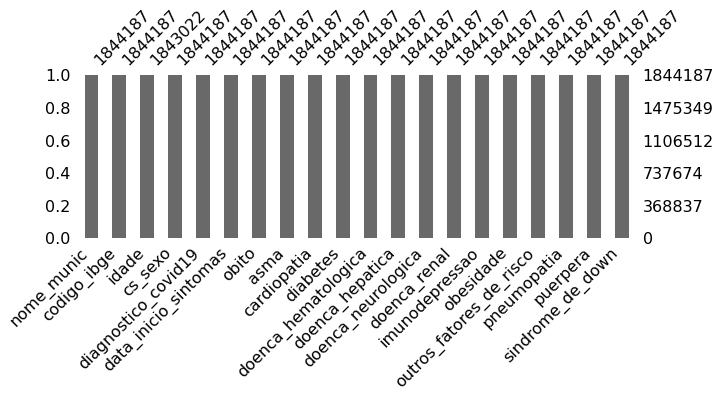

In [20]:
%%time
msno.bar(df, figsize=(10, 3))

In [21]:
df.isnull().sum()

nome_munic                    0
codigo_ibge                   0
idade                      1165
cs_sexo                       0
diagnostico_covid19           0
data_inicio_sintomas          0
obito                         0
asma                          0
cardiopatia                   0
diabetes                      0
doenca_hematologica           0
doenca_hepatica               0
doenca_neurologica            0
doenca_renal                  0
imunodepressao                0
obesidade                     0
outros_fatores_de_risco       0
pneumopatia                   0
puerpera                      0
sindrome_de_down              0
dtype: int64

Verificamos que há dados de idades faltantes. Verificando se podemos excluir esses dados:

In [22]:
total_nulos = df['idade'].isnull().sum()
total_registros = df.shape[0]
porcentagem = (total_nulos/total_registros) * 100
print(f'{porcentagem}%')

0.06317146796935452%


Como os dados nulos representam apenas 0.063%, vou excluí-los.

In [23]:
df.shape

(1844187, 20)

In [24]:
df.dropna(inplace=True)

In [25]:
df.shape

(1843022, 20)

## 3.4 Idade

### 3.4.1 Visualização da feature idade

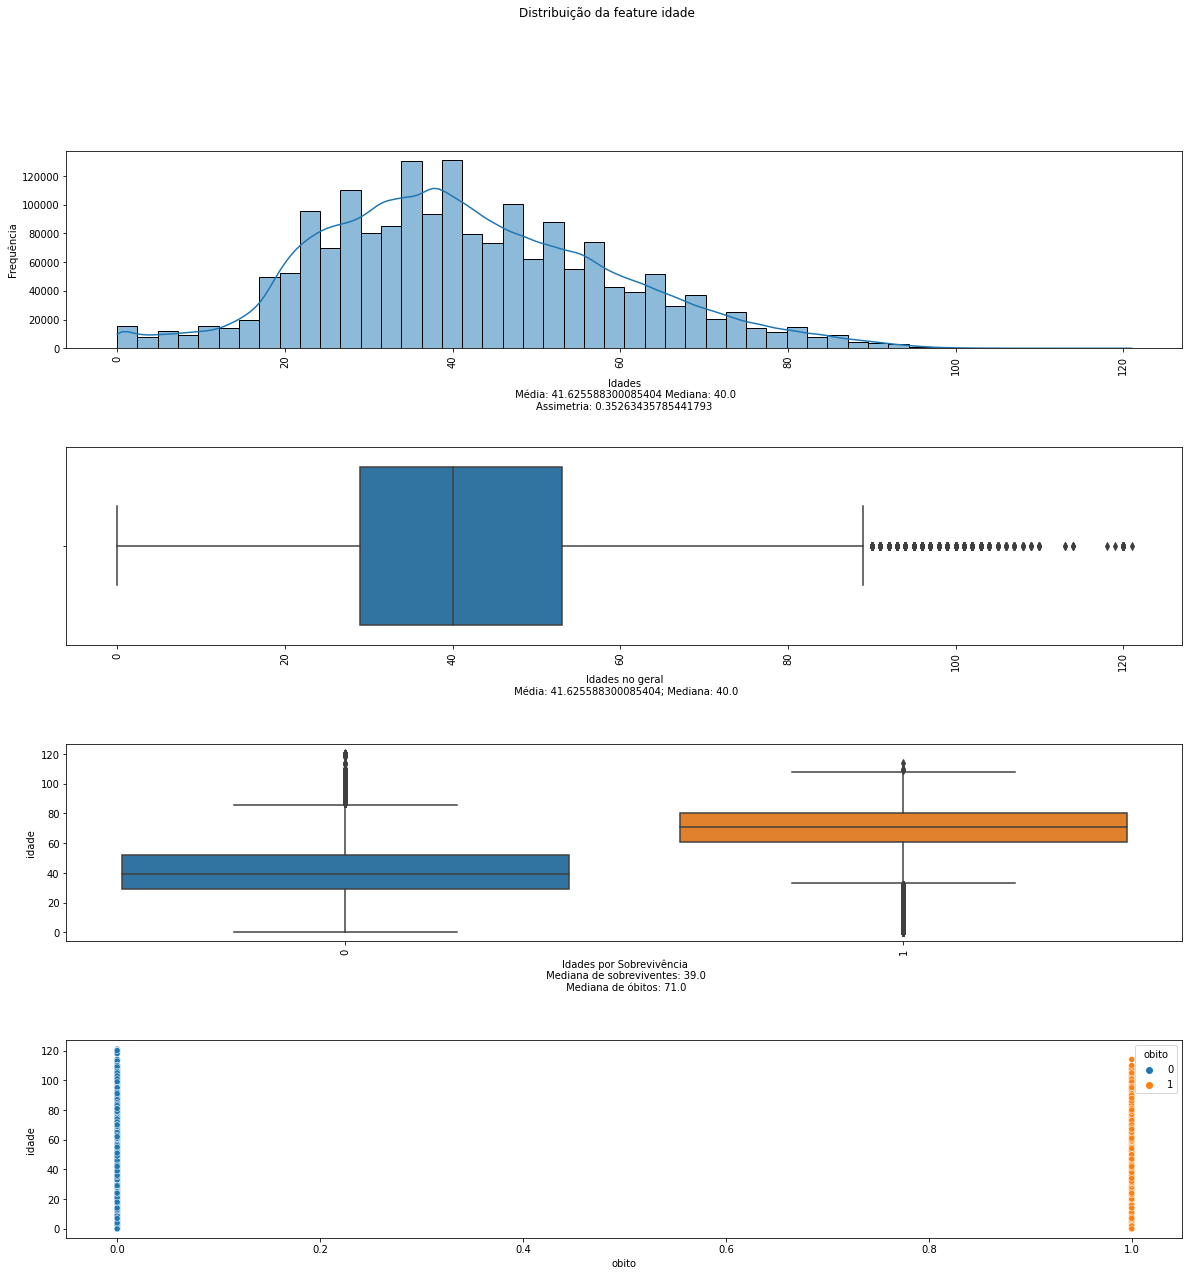

CPU times: user 1min 3s, sys: 6.26 s, total: 1min 10s
Wall time: 1min 4s


In [26]:
%%time

fig, axes = plt.subplots(4, 1, figsize = (20,20))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Distribuição da feature idade')

#Idade
sns.histplot(ax=axes[0],x=df['idade'], kde=True, bins=50)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Idades\n Média: ' + str(df['idade'].mean()) + ' Mediana: ' + str(df['idade'].median()) + '\nAssimetria: ' + str(df.idade.skew()), ylabel='Frequência')

#Idade - Boxplot
sns.boxplot(ax=axes[1],x=df['idade'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Idades no geral\n Média: ' + str(df['idade'].mean()) + '; Mediana: ' + str(df['idade'].median()))

#Idade - Boxplot
sns.boxplot(ax=axes[2],x=df['obito'], y=df['idade'])
axes[2].tick_params(axis='x', rotation=90)
axes[2].set(xlabel='Idades por Sobrevivência\n Mediana de sobreviventes: ' + str(df.loc[df['obito'] == 0]['idade'].median()) + '\n Mediana de óbitos: ' + str(df.loc[df['obito'] == 1]['idade'].median()))

#Idade vs Óbito
sns.scatterplot(ax=axes[3], data=df, x="obito", y="idade", hue="obito")

plt.show();

* Há outliers acima de 90 anos muito estranhos.

Como há outliers acima de 90 anos, vou verificar se posso considerar somente dados abaixo ou igual à 90 anos.

In [27]:
total_casos_maior_90 = df[ df['idade'] > 90].shape[0]
total_registros = df.shape[0]
porcentagem = (total_casos_maior_90/total_registros) * 100
print(f'{porcentagem}%')

0.38143874571220526%


Como representam apenas 0.38% dos dados, vou excluir registros com mais de 90 anos.

In [28]:
df.shape

(1843022, 20)

In [29]:
indexes2 = df[ df['idade'] > 90].index
df.drop(indexes2 , inplace=True)

In [30]:
df.shape

(1835992, 20)

Refazendo os gráficos:

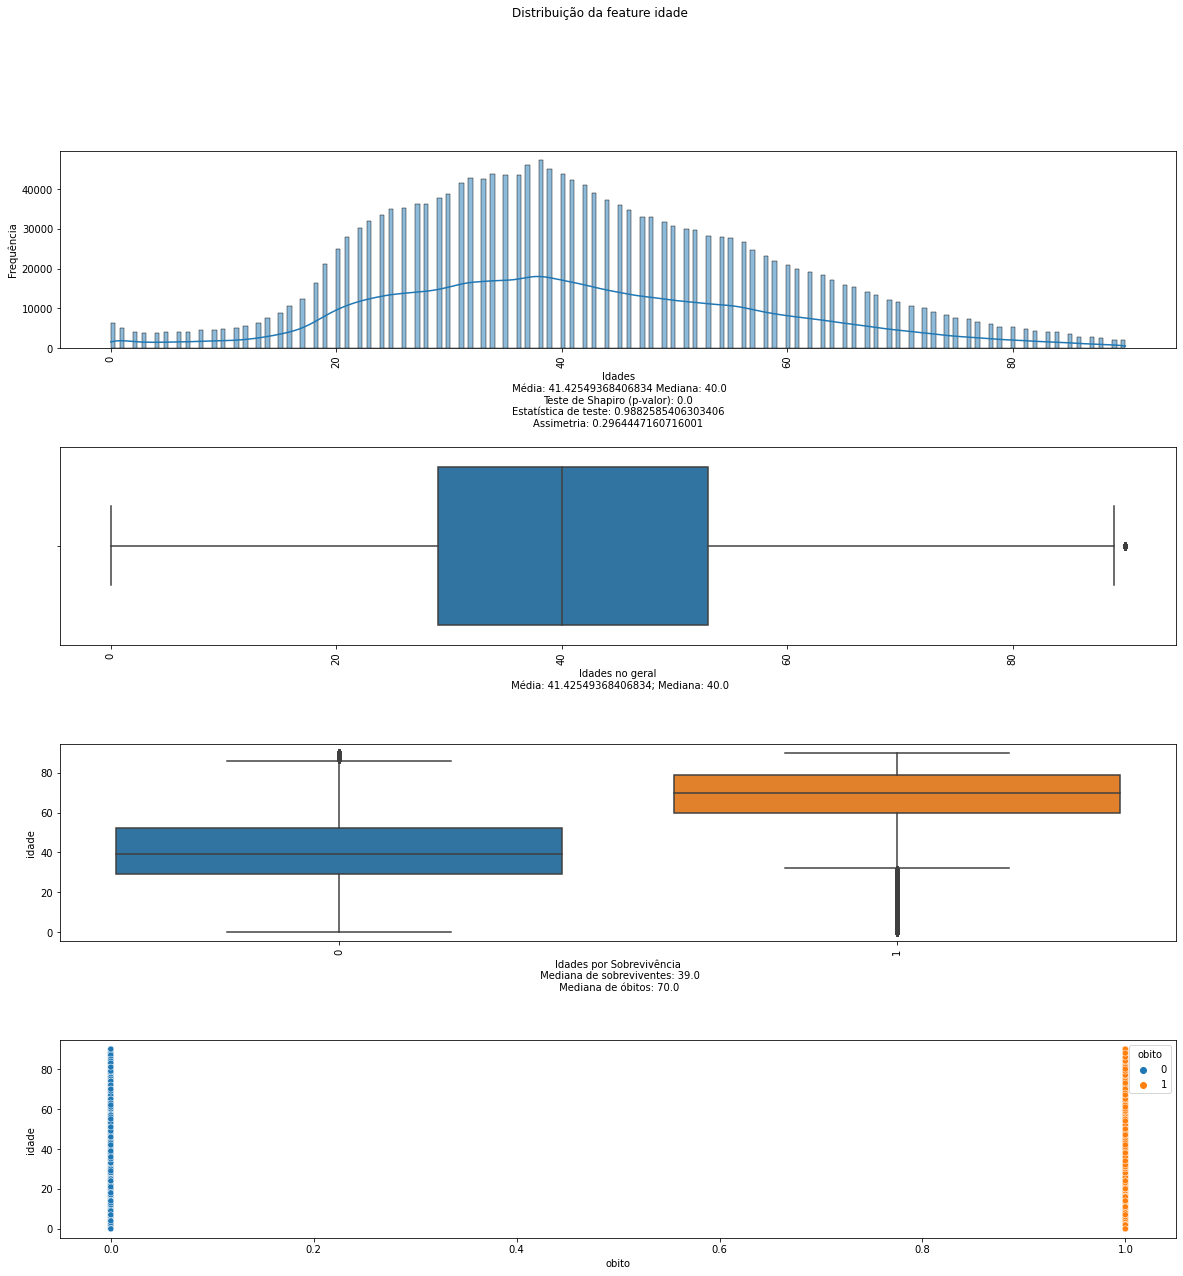

CPU times: user 1min 2s, sys: 5.86 s, total: 1min 8s
Wall time: 1min 2s


In [31]:
%%time
stat1,p1 = stats.shapiro(df['idade'].to_numpy())

fig, axes = plt.subplots(4, 1, figsize = (20,20))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Distribuição da feature idade')

#Idade
sns.histplot(ax=axes[0],x=df['idade'], kde=True)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Idades\n Média: ' + str(df['idade'].mean()) + ' Mediana: ' + str(df['idade'].median()) + '\nTeste de Shapiro (p-valor): ' 
            + str(p1) + '\nEstatística de teste: ' + str(stat1) + '\nAssimetria: ' + str(df.idade.skew()), ylabel='Frequência')

#Idade - Boxplot
sns.boxplot(ax=axes[1],x=df['idade'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Idades no geral\n Média: ' + str(df['idade'].mean()) + '; Mediana: ' + str(df['idade'].median()))

#Idade - Boxplot
sns.boxplot(ax=axes[2],x=df['obito'], y=df['idade'])
axes[2].tick_params(axis='x', rotation=90)
axes[2].set(xlabel='Idades por Sobrevivência\n Mediana de sobreviventes: ' + str(df.loc[df['obito'] == 0]['idade'].median()) + '\n Mediana de óbitos: ' + str(df.loc[df['obito'] == 1]['idade'].median()))

#Idade vs Óbito
sns.scatterplot(ax=axes[3], data=df, x="obito", y="idade", hue="obito")

plt.show();

* A média das idades no geral é de aproximadamente 41 anos e a mediana é 40.
* O teste de Shapiro-Wilk indica que a distribuição não é normal, pois p-value < 0.5.
* A assimetria positiva indica que existe uma concentração levemente maior de valores na zona de idades mais baixas da amostra.
* Os boxplots indicam que o grupo de sobreviventes tem mediana de 39 anos, e o grupo de óbitos tem mediana de 70 anos, o que indica mortalidade maior em pessoas com maior idade.
* A dispersão dos dados indicam que os dados tem pouca variabilidade, tanto no grupos de sobreviventes quanto no de óbitos.

### 3.4.2 Teste de hipótese sobre a relação de idade e óbito

Como visto anteriormente, a feature idade não tem distribuição normal.

In [32]:
stat2,p2 = stats.shapiro(df['idade'].to_numpy())

In [33]:
print(f'Estatística de teste: {stat2}')
print(f'P-value: {p2}')

Estatística de teste: 0.9882585406303406
P-value: 0.0


Por isso, vou tentar normalizar utilizando logarítmo.

In [34]:
def aplica_log(df):
  '''Aplica logarítmo no dado'''
  if df['idade'] == 0:
    return 0
  if df['idade'] > 0:
    return np.log(df['idade'])

In [35]:
%%time
df['log_idade'] = df.apply(aplica_log, axis=1)

CPU times: user 39.2 s, sys: 306 ms, total: 39.5 s
Wall time: 39.5 s


CPU times: user 276 ms, sys: 2.55 ms, total: 279 ms
Wall time: 278 ms


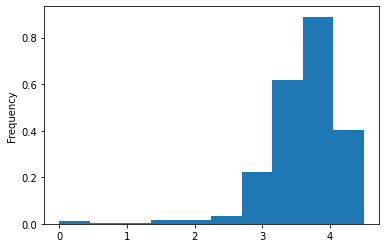

In [36]:
%%time
df['log_idade'].plot.hist(density=True)

Testando a normalidade novamente:

In [37]:
stat3, p3 = stats.shapiro(df['log_idade'])
print('O valor da estatística de Shapiro-Wilk = ' + str(stat3))
print('O valor de p de Shapiro-Wilk = ' + str(p3))

O valor da estatística de Shapiro-Wilk = 0.821019172668457
O valor de p de Shapiro-Wilk = 0.0


Continua não sendo normal. Vamos testar a raiz quadrada:

In [38]:
def aplica_rq(df):
  '''Aplica raiz quadrada no dado'''
  return np.sqrt(df['idade'])

In [39]:
%%time
df['sqrt_idade'] = df.apply(aplica_rq, axis=1)

CPU times: user 28.2 s, sys: 353 ms, total: 28.6 s
Wall time: 28.7 s


CPU times: user 271 ms, sys: 4.7 ms, total: 276 ms
Wall time: 274 ms


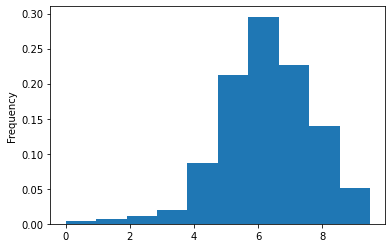

In [40]:
%%time
df['sqrt_idade'].plot.hist(density=True)

Testando a normalidade:

In [41]:
stat4, p4 = stats.shapiro(df['sqrt_idade'])
print('O valor da estatística de Shapiro-Wilk = ' + str(stat4))
print('O valor de p de Shapiro-Wilk = ' + str(p4))

O valor da estatística de Shapiro-Wilk = 0.9791151881217957
O valor de p de Shapiro-Wilk = 0.0


Ainda não, testando com raiz cúbica:

In [42]:
def aplica_rc(df):
  '''Aplica raiz quadrada no dado'''
  return np.cbrt(df['idade'])

In [43]:
%%time
df['cbrt_idade'] = df.apply(aplica_rc, axis=1)

CPU times: user 26.5 s, sys: 368 ms, total: 26.9 s
Wall time: 26.9 s


CPU times: user 264 ms, sys: 3.64 ms, total: 268 ms
Wall time: 266 ms


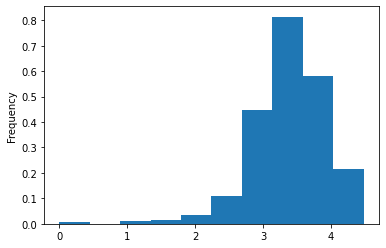

In [44]:
%%time
df['cbrt_idade'].plot.hist(density=True)

Testando a normalidade:

In [45]:
stat5, p5 = stats.shapiro(df['cbrt_idade'])
print('O valor da estatística de Shapiro-Wilk = ' + str(stat5))
print('O valor de p de Shapiro-Wilk = ' + str(p5))

O valor da estatística de Shapiro-Wilk = 0.9305524826049805
O valor de p de Shapiro-Wilk = 0.0


Não conseguimos obter uma curva próxima da normal. Uma indicação, como vimos [aqui](https://support.minitab.com/pt-br/minitab/19/help-and-how-to/statistics/basic-statistics/supporting-topics/normality/what-to-do-with-nonnormal-data/), é aplicar o Teste U de Mann-Whitney. Este [artigo](https://www.marsja.se/how-to-perform-mann-whitney-u-test-in-python-with-scipy-and-pingouin/) explica como executar este teste.

Dividindo o conjunto em dois grupos, um de sobreviventes e outro de óbitos.

In [46]:
df.head(1)

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,...,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down,log_idade,sqrt_idade,cbrt_idade
13,Santa Bárbara d'Oeste,3545803,56.00000,FEMININO,CONFIRMADO,2020-10-20 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,...,IGNORADO,SIM,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,4.02535,7.48331,3.82586


In [47]:
%%time
sobreviventes = df.loc[df['obito'] == 0]
obitos = df.loc[df['obito'] == 1]

CPU times: user 358 ms, sys: 2.55 ms, total: 360 ms
Wall time: 362 ms


In [48]:
print(f'Quantidade de sobreviventes: {sobreviventes.shape[0]}')
print(f'Quantidade de obitos: {obitos.shape[0]}')

Quantidade de sobreviventes: 1779707
Quantidade de obitos: 56285


Obtendo as médias de idades.

In [49]:
%%time
media_sobreviventes = sobreviventes['idade'].mean()
media_obitos = obitos['idade'].mean()
print(f'Média de idades de sobreviventes: {media_sobreviventes}')
print(f'Média de idades de obitos: {media_obitos}')

Média de idades de sobreviventes: 40.587749556528124
Média de idades de obitos: 67.91459536288532
CPU times: user 11.6 ms, sys: 0 ns, total: 11.6 ms
Wall time: 14.8 ms


Definindo as hipóteses:

Vamos fazer um teste unicaudal para um alfa = 0,05 para testar se podemos afirmar de forma estatisticamente significativa que os óbitos ocorrem mais frequentemente com pessoas com maior idade.

* H0 - Não há diferença relevante entre as idades de óbitos e sobreviventes
* H1 - A idade de óbitos é maior

Testando se a diferença entre as idades dos grupos é estatisticamente relevante com o Teste U.

In [50]:
%%time
#teste = mwu(obitos['idade'], sobreviventes['idade'], alternative='greater') - estoura a memória disponível no Colab Free
teste = stats.mannwhitneyu(obitos['idade'], sobreviventes['idade'], alternative="greater")

CPU times: user 1.44 s, sys: 5.16 ms, total: 1.45 s
Wall time: 1.44 s


In [51]:
print('O valor da estatística do Teste U: ' + str(teste[0]))
print('O valor de p do Teste U: ' + str(teste[1]))

O valor da estatística do Teste U: 89044109889.0
O valor de p do Teste U: 0.0


Com o p-valor < 0.05, temos argumento estatístico para afirmar que óbitos ocorrem mais frequentemente em idades mais altas. Podemos dizer com 95% de confiança que pessoas com maior idade estão mais propensas a ter maiores complicações com a doença.

## 3.5 Problema gerado pela alta frequência de valores 'IGNORADO' nas variáveis

Durante a análise descritiva, percebemos que a frequência de 'IGNORADO' nas colunas de doenças é muito grande.

In [53]:
df.columns

Index(['nome_munic', 'codigo_ibge', 'idade', 'cs_sexo', 'diagnostico_covid19',
       'data_inicio_sintomas', 'obito', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade',
       'outros_fatores_de_risco', 'pneumopatia', 'puerpera',
       'sindrome_de_down', 'log_idade', 'sqrt_idade', 'cbrt_idade'],
      dtype='object')

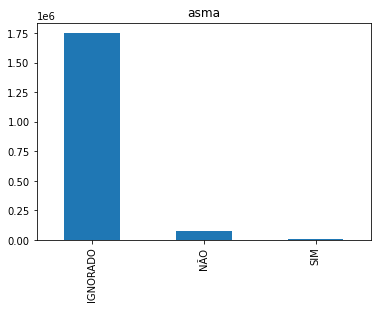

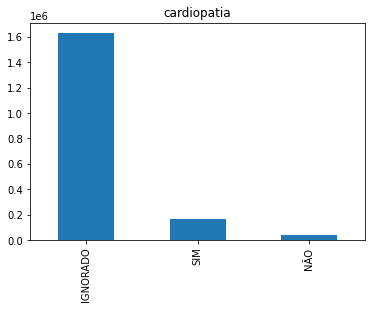

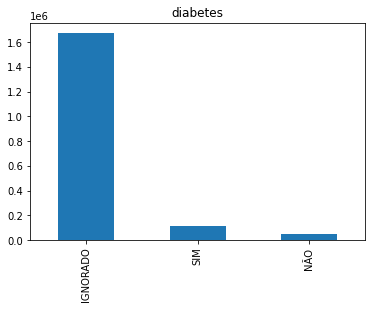

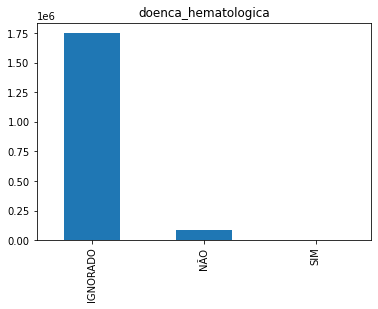

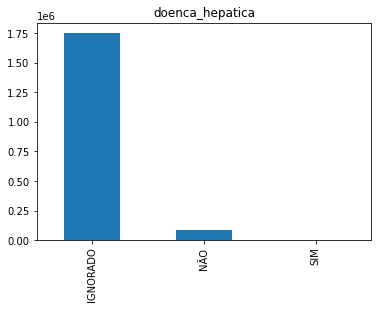

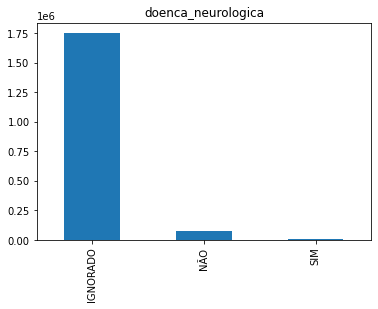

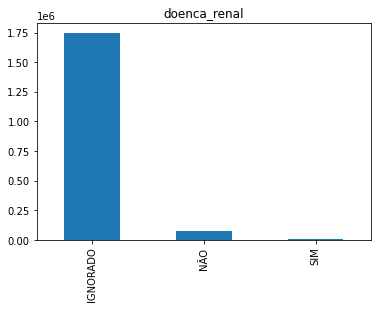

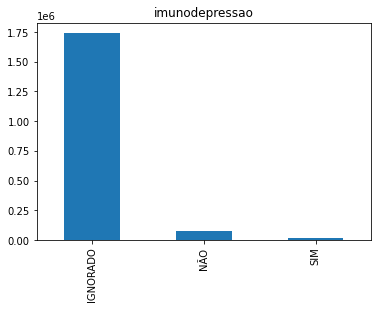

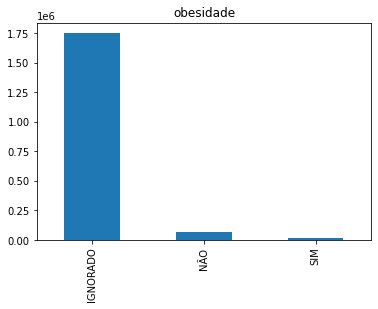

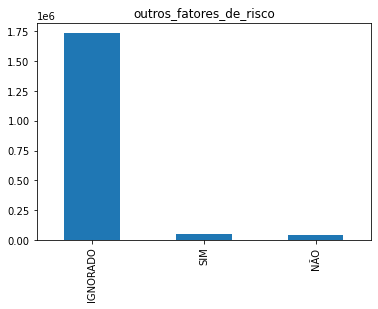

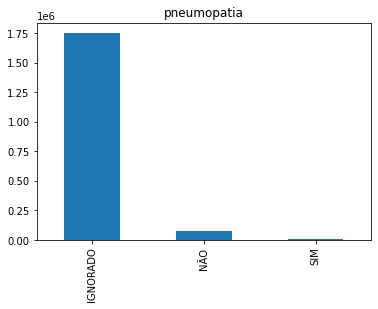

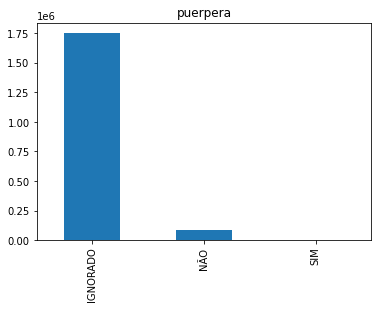

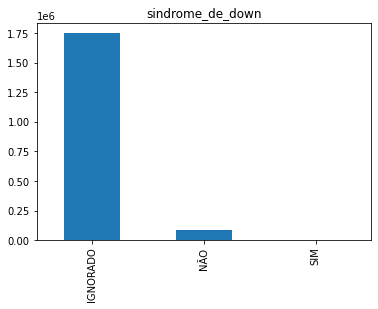

CPU times: user 5.44 s, sys: 75 ms, total: 5.52 s
Wall time: 6.52 s


In [77]:
%%time
colunas_doencas = ['asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade',
       'outros_fatores_de_risco', 'pneumopatia', 'puerpera',
       'sindrome_de_down']

for coluna in colunas_doencas:
  df[coluna].value_counts().plot.bar(title=coluna)
  plt.show();

### 3.5.1 Teste de hipótese para ver se a amostra sem IGNORADO difere do conjunto completo

Como uma ideia de solucionar, pensamos em utilizar o dataframe limpo de campos com IGNORADO que obtemos no início e focar na cidade com maior número de casos, que é São Paulo. Mas antes, para validar se foge muito da população, vamos testar se o dataframe sem ignorados tem diferença estatísticamente relevante entre as idades.

Já criamos um grupo sem ignorados antes.

In [97]:
df_sem_ignorados.shape

(185800, 20)

Fazendo o Teste U.

H0 -> Não há diferença entre as idades dos grupos

H1 -> Há diferença entre as idades dos dois grupos

In [100]:
teste2 = stats.mannwhitneyu(df_sem_ignorados['idade'], df['idade'], alternative="two-sided")

In [101]:
print('O valor da estatística do Teste U: ' + str(teste2[0]))
print('O valor de p do Teste U: ' + str(teste2[1]))

O valor da estatística do Teste U: 274713862311.5
O valor de p do Teste U: 0.0


Como p-valor < 0.5, refuto H0. Há diferença significativa de idade entre os grupos com IGNORADO e sem valores com IGNORADO.

Visualizando:

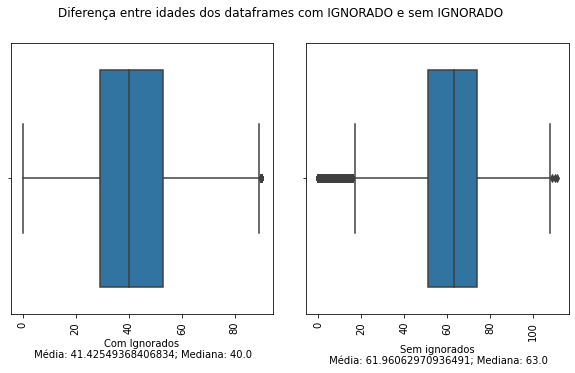

CPU times: user 369 ms, sys: 5.64 ms, total: 375 ms
Wall time: 377 ms


In [109]:
%%time
fig, axes = plt.subplots(1, 2, figsize = (10,5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Diferença entre idades dos dataframes com IGNORADO e sem IGNORADO')

#Idade - Boxplot
sns.boxplot(ax=axes[0],x=df['idade'])
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Com Ignorados\n Média: ' + str(df['idade'].mean()) + '; Mediana: ' + str(df['idade'].median()))

#Idade - Boxplot
sns.boxplot(ax=axes[1],x=df_sem_ignorados['idade'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Sem ignorados\n Média: ' + str(df_sem_ignorados['idade'].mean()) + '; Mediana: ' + str(df_sem_ignorados['idade'].median()))

plt.show();

Temos que diferem muito nas distribuições das idades.

### 3.5.1 Teste de hipótese para ver se a amostra sem IGNORADO da cidade de São Paulo difere do conjunto completo

Obtendo os grupos.

In [113]:
%%time
df_sp = df.loc[df.nome_munic == 'São Paulo']
df_sp_si = df_sem_ignorados.loc[df_sem_ignorados.nome_munic == 'São Paulo']

CPU times: user 324 ms, sys: 373 µs, total: 324 ms
Wall time: 338 ms


Fazendo o teste

In [114]:
teste3 = stats.mannwhitneyu(df_sp_si['idade'], df_sp['idade'], alternative="two-sided")

In [115]:
print('O valor da estatística do Teste U: ' + str(teste3[0]))
print('O valor de p do Teste U: ' + str(teste3[1]))

O valor da estatística do Teste U: 14957916573.0
O valor de p do Teste U: 0.0


Com p-valor < 0.5, rejeita-se a hipótese nula. A distribuição das idades são diferentes.

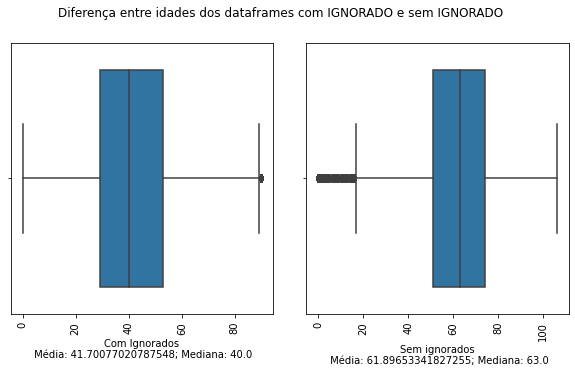

CPU times: user 408 ms, sys: 8.78 ms, total: 416 ms
Wall time: 957 ms


In [116]:
%%time
fig, axes = plt.subplots(1, 2, figsize = (10,5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Diferença entre idades dos dataframes com IGNORADO e sem IGNORADO')

#Idade - Boxplot
sns.boxplot(ax=axes[0],x=df_sp['idade'])
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Com Ignorados\n Média: ' + str(df_sp['idade'].mean()) + '; Mediana: ' + str(df_sp['idade'].median()))

#Idade - Boxplot
sns.boxplot(ax=axes[1],x=df_sp_si['idade'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Sem ignorados\n Média: ' + str(df_sp_si['idade'].mean()) + '; Mediana: ' + str(df_sp_si['idade'].median()))

plt.show();